In [17]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

In [18]:
gfs_df = pd.read_csv("pds.csv")

In [19]:
gfs_df.head()

,Date,UTtime,Temperature,RelativeHumidity,Pressure,Windspeed,Winddirection,Rainfall,Snowfall,Snowdepth,Short-wave_irradiation
0,19-06-2019,01:00,304.91,39.57,975.11,2.73,200.71,0.0,0,0,81.4634
1,19-06-2019,02:00,305.54,38.34,975.33,2.60,202.04,0.0,0,0,233.3528
2,19-06-2019,03:00,306.17,37.11,975.56,2.46,203.51,0.0,0,0,413.5005
3,19-06-2019,04:00,307.55,33.60,975.67,2.25,192.07,0.0,0,0,600.8880
4,19-06-2019,05:00,308.94,30.09,975.79,2.14,178.88,0.0,0,0,779.7729


In [20]:
gfs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
Date                      96 non-null object
UTtime                    96 non-null object
Temperature               96 non-null float64
RelativeHumidity          96 non-null float64
Pressure                  96 non-null float64
Windspeed                 96 non-null float64
Winddirection             96 non-null float64
Rainfall                  96 non-null float64
Snowfall                  96 non-null int64
Snowdepth                 96 non-null int64
Short-wave_irradiation    96 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 8.3+ KB


In [34]:
def kel_to_cel(celsius):
    Temperature = celsius
    kel = 273.15
    celsius = celsius -kel
    return celsius

In [36]:
gfs_df['celsius'] = gfs_df['Temperature'].apply(kel_to_cel)

In [88]:
gfs_df[0:9]

,Date,UTtime,Temperature,RelativeHumidity,Pressure,Windspeed,Winddirection,Rainfall,Snowfall,Snowdepth,Short-wave_irradiation,celsius,cate
0,19-06-2019,01:00,304.91,39.57,975.11,2.73,200.71,0.0,0,0,81.4634,31.76,In range (30-35) C
1,19-06-2019,02:00,305.54,38.34,975.33,2.60,202.04,0.0,0,0,233.3528,32.39,In range (30-35) C
2,19-06-2019,03:00,306.17,37.11,975.56,2.46,203.51,0.0,0,0,413.5005,33.02,In range (30-35) C
3,19-06-2019,04:00,307.55,33.60,975.67,2.25,192.07,0.0,0,0,600.8880,34.40,In range (30-35) C
4,19-06-2019,05:00,308.94,30.09,975.79,2.14,178.88,0.0,0,0,779.7729,35.79,In range of (35-40) C
5,19-06-2019,06:00,310.33,26.58,975.91,2.15,165.09,0.0,0,0,880.2435,37.18,In range of (35-40) C
6,19-06-2019,07:00,311.15,24.19,974.90,1.95,159.90,0.0,0,0,934.2504,38.00,In range of (35-40) C
7,19-06-2019,08:00,311.98,21.80,973.90,1.76,153.55,0.0,0,0,937.1817,38.83,In range of (35-40) C
8,19-06-2019,09:00,312.80,19.41,972.89,1.60,145.82,0.0,0,0,855.6708,39.65,In range of (35-40) C


In [69]:
def cel_cat(cate):
    celsius = cate
    if cate <= 35:
        return 'In range (30-35) C'
    elif cate <=40 and cate >=35:
        return 'In range of (35-40) C'

In [70]:
gfs_df['cate'] = gfs_df['celsius'].apply(cel_cat)

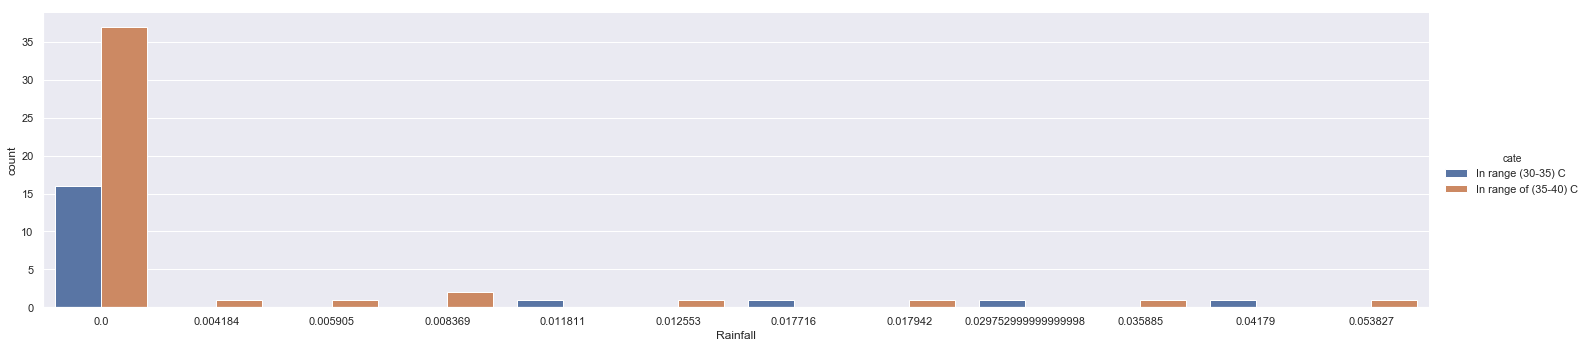

In [71]:
sns.catplot('Rainfall', data=gfs_df,hue='cate', kind="count",aspect=4)

Text(0, 0.5, 'Time')

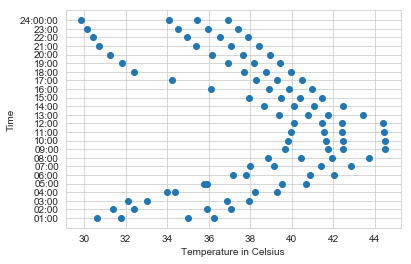

In [49]:
x = gfs_df['celsius']
y = gfs_df['UTtime']
plt.scatter(x,y)
plt.show
plt.xlabel("Temperature in Celsius")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

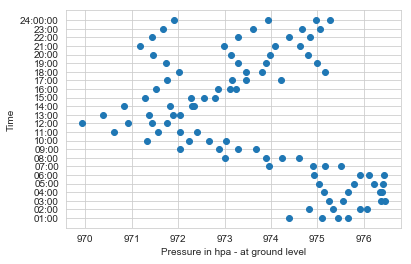

In [53]:
x = gfs_df['Pressure']
y = gfs_df['UTtime']
plt.scatter(x,y)
plt.show
plt.xlabel("Pressure in hpa - at ground level")
plt.ylabel("Time")

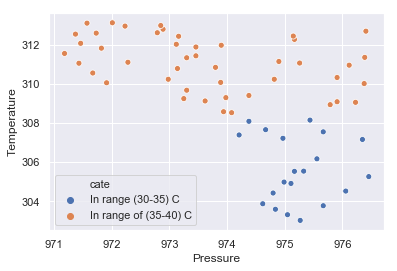

In [72]:
sns.set(style="darkgrid")

g = sns.scatterplot("Pressure", "Temperature",hue='cate', data=gfs_df)

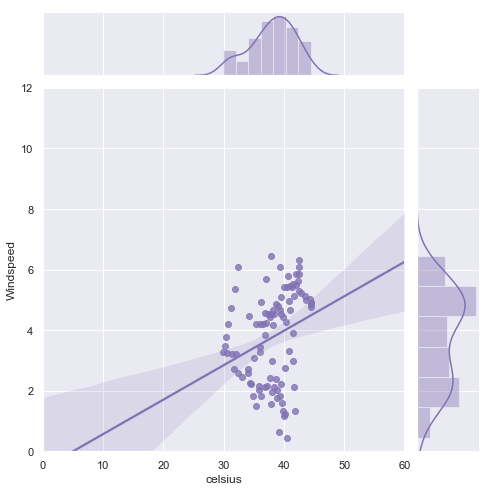

In [78]:
sns.set(style="darkgrid")

g = sns.jointplot("celsius", "Windspeed", data=gfs_df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)

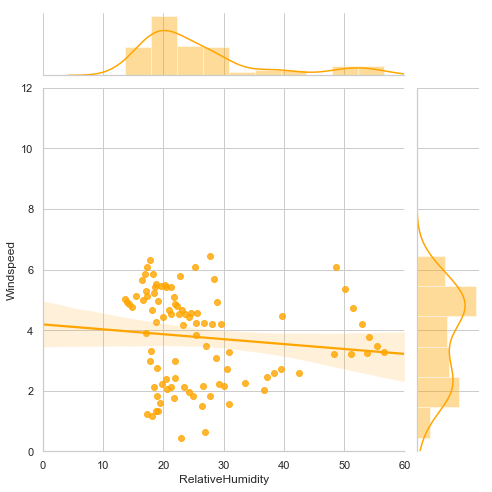

In [87]:
sns.set(style="whitegrid")

g = sns.jointplot("RelativeHumidity", "Windspeed", data=gfs_df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12),color='orange', height=7)